In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score # Should we just use accuracy?
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


## Prepare the Data

In [3]:
df = pd.read_csv('data/glass/glass.csv')

dfX = df.drop(columns=['ID','TYPE'])
X = dfX.to_numpy()

dfY = df['TYPE']
Y = dfY.to_numpy()

In [4]:
vals = list(dfY.unique())
print(dfY.unique())
print([len(df[df['TYPE']==a])/len(dfY) for a in vals]) # Look for relative abundance of classes.

[1 2 3 5 6 7]
[0.32710280373831774, 0.35514018691588783, 0.0794392523364486, 0.06074766355140187, 0.04205607476635514, 0.13551401869158877]


In [5]:
changeY = {1:0, 2:1, 3:2, 5:3, 6:4, 7:5} #NLLLoss wants the classes to start at 0 and not skip.
Y1 = np.array([changeY.get(item) for item in Y])

In [6]:
myscaler = pre.StandardScaler(copy=False)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.15, random_state=42) # Split the data

myscaler.fit(X_train) # compute mean, stdev.
myscaler.transform(X_train) # standardize training data
myscaler.transform(X_test) # standardize test data.
print("done preprocessing")

done preprocessing


In [8]:
train_X = Variable(torch.Tensor(X_train).float()).to(device) # convert to torch tensors and send to device.
test_X = Variable(torch.Tensor(X_test).float()).to(device) # We use Variable for backprop.
train_y = Variable(torch.Tensor(y_train).long()).to(device)
test_y = Variable(torch.Tensor(y_test).long()).to(device)

In [10]:
hidden_layers=100 # Too much??
net=myNet(input_size=9,hidden_size=hidden_layers, output_size=len(df['TYPE'].unique()))
net.to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1) # I like GD. Few enough points to not need batches??

In [11]:
losses=[]
for epoch in range(1000):
    optimizer.zero_grad()
    out = net(train_X)
    #print(out.shape)
    #print(train_y.shape)
    loss = criterion(out, train_y)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

number of epoch 999 loss tensor(-0.8115)
Train Accuracy: 0.8232044198895028
Test Accuracy: 0.7878787878787878


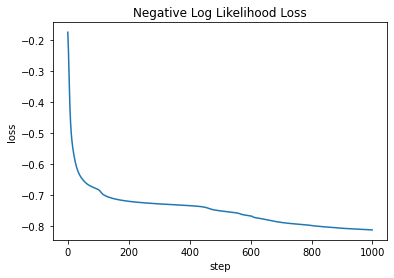

In [12]:
plt.title("Negative Log Likelihood Loss")
plt.xlabel("step")
plt.ylabel("loss")
print('number of epoch', epoch, 'loss', loss.data)
predict_out = net(train_X)
_, predict_y = torch.max(predict_out, 1)
print("Train Accuracy:",accuracy_score(train_y.data, predict_y.data))
predict_out = net(test_X)
_, predict_y = torch.max(predict_out, 1)
print("Test Accuracy:",accuracy_score(test_y.data, predict_y.data))
plt.plot(losses)

In [1]:
hidden_layers2=16 # Too much??
net2=myNet(input_size=9,hidden_size=hidden_layers2, output_size=len(df['TYPE'].unique()))
net2.to(device)
criterion2 = nn.NLLLoss()
optimizer2 = torch.optim.SGD(net2.parameters(), lr=1) 

NameError: name 'myNet' is not defined